## Importing the Keras libraries and packages

In [1]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


### Create an object of the sequential class

In [1]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

NameError: ignored

## Data preprocessing

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 25,
validation_data = test_set,
validation_steps = 2000)

OSError: ignored

## Cifar10

In [1]:
import numpy as np
from keras.datasets import cifar10
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()

Using TensorFlow backend.


170508288/170498071 [==============================] - 19s 0us/step


In [6]:
x_train_image[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

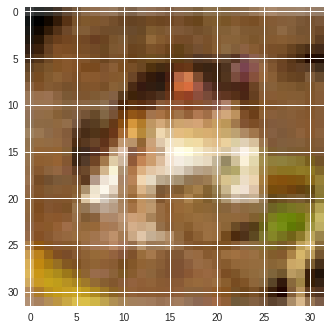

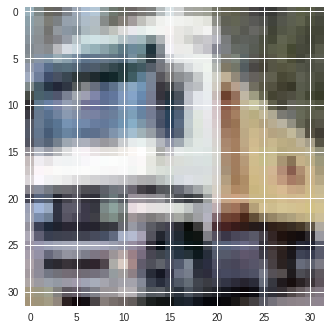

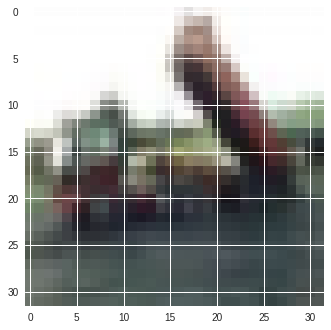

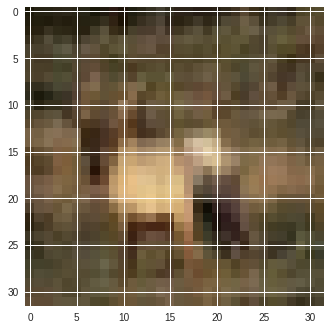

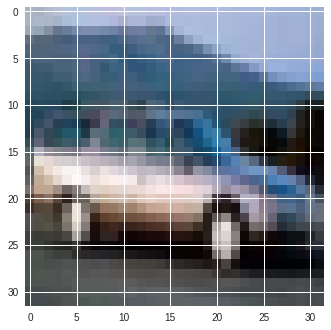

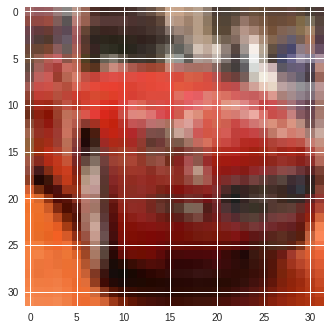

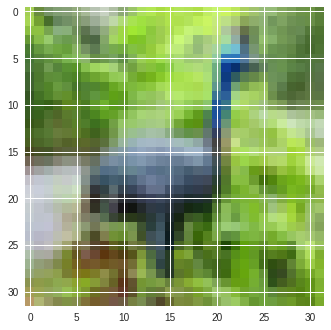

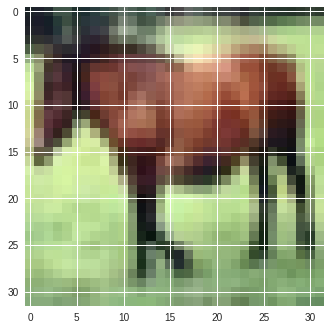

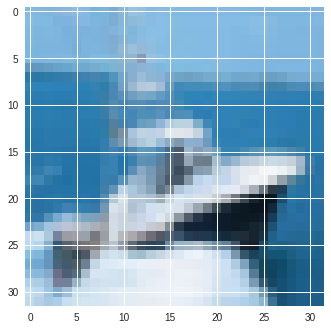

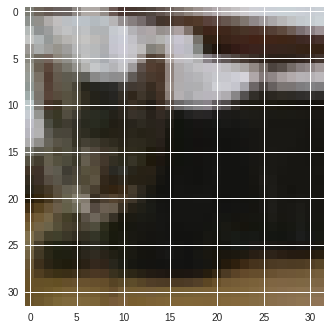

In [13]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.imshow(x_train_image[i])
  plt.show()

In [0]:
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0  

from keras.utils import np_utils
y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [0]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
from keras.layers import ZeroPadding2D,Activation  

model=Sequential()
model.add(Conv2D(filters=32,  
                 kernel_size=(3,3),
                 padding='same',  
                 input_shape=(32,32,3),  
                 activation='relu'))  
model.add(Dropout(0.25))  
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(Dropout(0.25))  
model.add(MaxPooling2D(pool_size=(2, 2)))  

# 建立分類模型 (MLP) : 平坦層 + 隱藏層 (1024 神經元) + 輸出層 (10 神經元)

model.add(Flatten())
model.add(Dropout(0.25))   
model.add(Dense(1024,activation='relu'))  
model.add(Dropout(0.25))  
model.add(Dense(10,activation='softmax'))  
print(model.summary())

In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train_normalize, y=y_
                        train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 126s - loss: 1.5317 - acc: 0.4500 - val_loss: 1.3520 - val_acc: 0.5606
Epoch 2/10
 - 126s - loss: 1.1592 - acc: 0.5910 - val_loss: 1.1447 - val_acc: 0.6429
Epoch 3/10
 - 127s - loss: 1.0045 - acc: 0.6461 - val_loss: 1.0186 - val_acc: 0.6664
Epoch 4/10
 - 127s - loss: 0.8979 - acc: 0.6834 - val_loss: 0.9859 - val_acc: 0.6719
Epoch 5/10
 - 127s - loss: 0.8059 - acc: 0.7199 - val_loss: 0.8942 - val_acc: 0.7042
Epoch 6/10
 - 126s - loss: 0.7398 - acc: 0.7369 - val_loss: 0.8719 - val_acc: 0.7063
Epoch 7/10
 - 127s - loss: 0.6643 - acc: 0.7677 - val_loss: 0.8255 - val_acc: 0.7246
Epoch 8/10
 - 127s - loss: 0.5874 - acc: 0.7954 - val_loss: 0.8244 - val_acc: 0.7187
Epoch 9/10
 - 126s - loss: 0.5274 - acc: 0.8156 - val_loss: 0.7783 - val_acc: 0.7382
Epoch 10/10
 - 126s - loss: 0.4707 - acc: 0.8343 - val_loss: 0.7777 - val_acc: 0.7370


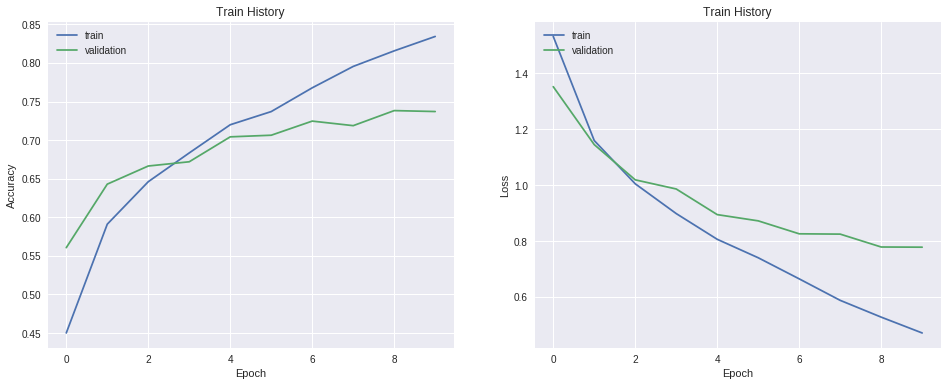

In [36]:
#繪製訓練結果
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.plot(train_history.history["val_acc"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
import matplotlib.pyplot as plt  
show_train_history(train_history)  

In [38]:
#評估預測準確率
scores=model.evaluate(x_test_normalize, y_test_onehot)  
print("Accuracy=", scores[1])
prediction=model.predict_classes(x_test_normalize)
print(prediction)

#預測測試集圖片
prediction=model.predict_classes(x_test_normalize)
print(prediction)

10000/10000 [==============================] - 8s 815us/step
('Accuracy=', 0.7336)
[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


array([3, 8, 8, ..., 5, 1, 7])

In [40]:
#混淆幾陣
import pandas as pd
pd.crosstab(y_test_label.reshape(-1), prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,795,9,28,9,19,1,9,21,82,27
1,17,831,2,12,4,4,5,5,40,80
2,79,4,545,55,150,31,62,51,18,5
3,34,12,53,525,92,124,57,56,29,18
4,16,3,31,30,761,22,37,85,13,2
5,22,2,32,179,82,548,36,73,18,8
6,9,4,25,52,70,15,791,17,12,5
7,13,2,13,24,49,23,7,853,6,10
8,42,20,13,6,6,3,3,5,890,12
